In [210]:
# Data Manipulation
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

# Stats
#from statsmodels.graphics.gofplots import qqplot

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from statsmodels.graphics.gofplots import qqplot

In [211]:
# Holdout, Cross Val
from sklearn.model_selection import train_test_split, cross_validate

# Preprocessing
## Imputers
from sklearn.impute import SimpleImputer, KNNImputer
## Scalers
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MultiLabelBinarizer
## Encoders
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
## Pipeline and Column Transformers
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn import set_config; set_config(display="diagram")

# Importing data

In [212]:
#Importing the CSVs to Dataframe format
UsersDF = pd.read_csv('../raw_data/users_cleaned.csv')
AnimesDF = pd.read_csv('../raw_data/anime_cleaned.csv')
ScoresDF = pd.read_csv('../raw_data/animelists_cleaned.csv')

In [213]:
AnimesDF.duplicated().sum()

0

# Drop Duplicate

In [214]:
AnimesDF = AnimesDF.drop_duplicates()
print(f"AnimesDF.shape = {AnimesDF.shape}")
print(f"Train: {AnimesDF.shape[0]} anime, {AnimesDF.shape[1]} features")

AnimesDF.shape = (6668, 33)
Train: 6668 anime, 33 features


# Data Type

object     22
int64       6
float64     4
bool        1
Name: count, dtype: int64

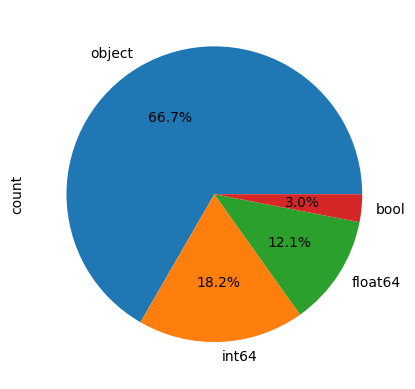

In [215]:
# DTYPES
display(AnimesDF.dtypes.value_counts())
# CUTIE PIE
AnimesDF.dtypes.value_counts().plot(kind="pie", autopct='%1.1f%%');

In [216]:
# NUMERICAL FEATURES
numerical_features = AnimesDF.select_dtypes(include=["int64","float64"]).columns
print(f"There are {len(numerical_features)} numerical features:")
display(numerical_features)

There are 10 numerical features:


Index(['anime_id', 'episodes', 'score', 'scored_by', 'rank', 'popularity',
       'members', 'favorites', 'duration_min', 'aired_from_year'],
      dtype='object')

In [217]:
# CATEGORICAL FEATURES
categorical_features = AnimesDF.select_dtypes(include=["object"]).columns
print(f"There are {len(categorical_features)} categorical features:")
display(categorical_features)

There are 22 categorical features:


Index(['title', 'title_english', 'title_japanese', 'title_synonyms',
       'image_url', 'type', 'source', 'status', 'aired_string', 'aired',
       'duration', 'rating', 'background', 'premiered', 'broadcast', 'related',
       'producer', 'licensor', 'studio', 'genre', 'opening_theme',
       'ending_theme'],
      dtype='object')

# Select columns to analysis

In [218]:
selected_columns= ['episodes', 'score', 'scored_by', 'rank', 'popularity',
       'members', 'favorites', 'duration_min', 'aired_from_year','genre']
AnimesDF_selected=AnimesDF[selected_columns]
AnimesDF_selected['genre'] = AnimesDF_selected['genre'].str.split(', ')

/var/folders/yr/g3l3s88n1fj3tj6803gfpmm80000gn/T/ipykernel_36597/4266329996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AnimesDF_selected['genre'] = AnimesDF_selected['genre'].str.split(', ')


In [219]:
AnimesDF_selected.isnull().sum()

episodes             0
score                0
scored_by            0
rank               356
popularity           0
members              0
favorites            0
duration_min         0
aired_from_year      0
genre                4
dtype: int64

# Drop Null


In [220]:
AnimesDF_selected =AnimesDF_selected .dropna(subset=['genre'])

# Drop Hentai Data

In [237]:
def filter_genres(row):
    genres = row["genre"]
    if "Hentai" in genres or "Ecchi" in genres:
        return False
    return True

AnimesDF_selected = AnimesDF_selected[AnimesDF_selected.apply(filter_genres, axis=1)]

# Numerical Features

In [238]:
Anime_num=AnimesDF_selected.select_dtypes(exclude=["object"])
Anime_cat=AnimesDF_selected["genre"]

In [239]:
AnimesDF.groupby("type").agg({"duration_min":["min","mean","median","std","max"]})


duration_min                                    
                 min       mean median        std    max
type                                                    
Movie       0.000000  71.920319   83.5  36.434080  163.0
Music       0.416667   5.340986    4.0   8.225941   67.0
ONA         0.000000   8.507108    5.0   9.156702   94.0
OVA         0.000000  29.851301   29.0  13.491462  126.0
Special     0.000000  19.371762   14.0  22.487023  160.0
TV          0.000000  20.875179   24.0   7.109729   50.0

In [240]:
mask = AnimesDF.duration_min == 0
AnimesDF[mask]

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
184,25441,Shin Strange+ Special,NaN,真 ストレンジ・プラス,"Shin Strange Plus Special, Sin Strange Plus Sp...",https://myanimelist.cdn-dena.com/images/anime/...,Special,Manga,1,Finished Airing,False,"Oct 19, 2014","{'from': '2014-10-19', 'to': '2014-10-19'}",Unknown,PG-13 - Teens 13 or older,6.01,267,7337.0,7663,1354,0,NaN,NaN,NaN,"{'Parent story': [{'mal_id': 23433, 'type': 'a...",Dream Creation,NaN,Seven,"Slice of Life, Comedy, Josei",[],[],0.0,2014.0
358,32275,Nar Doma Special,NaN,ナルどマ 少女に優しい俺が好き,Narudoma Special,https://myanimelist.cdn-dena.com/images/anime/...,Special,Web manga,1,Finished Airing,False,"Nov 13, 2015","{'from': '2015-11-13', 'to': '2015-11-13'}",Unknown,PG-13 - Teens 13 or older,6.11,9,11410.0,12499,123,0,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 86807, 'type': 'man...",comico,NaN,Kachidoki Studio,Comedy,[],[],0.0,2015.0
471,34198,Kamisama Minarai: Himitsu no Cocotama Movie - ...,NaN,映画 かみさまみならい ヒミツのここたま 奇跡をおこせ♪テップルとドキドキここたま界,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,1,Finished Airing,False,"Apr 28, 2017","{'from': '2017-04-28', 'to': '2017-04-28'}",Unknown,PG - Children,5.44,9,10733.0,11201,204,0,The film screened alongside Tamagotchi Movie: ...,NaN,NaN,"{'Other': [{'mal_id': 31044, 'type': 'anime', ...","Lantis, Bandai",NaN,OLM,"Kids, Magic, Fantasy",[],[],0.0,2017.0
808,34151,Landreaall,NaN,NaN,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,0,Finished Airing,False,"Feb 25, 2017","{'from': '2017-02-25', 'to': '2017-02-25'}",Unknown,PG-13 - Teens 13 or older,5.94,18,11060.0,8052,1127,0,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 8751, 'type': 'mang...",NaN,NaN,Will Palette,"Action, Adventure, Romance, Martial Arts, Fantasy",[],[],0.0,2017.0
878,10506,Shiawase Haitatsu Taneko,NaN,しあわせ配達おみくじタネコ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,0,Currently Airing,True,"Mar 26, 2011 to ?","{'from': '2011-03-26', 'to': None}",Unknown,NaN,5.46,13,12034.0,10676,267,0,NaN,Spring 2011,Not scheduled once per week,[],NaN,NaN,Kachidoki Studio,Comedy,[],[],0.0,2011.0
1180,33087,Meiji Tokyo Renka Movie: Hanakagami no Fantasia,NaN,劇場版 明治東亰恋伽 〜花鏡の幻想曲〜,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Game,1,Finished Airing,False,"May 6, 2016","{'from': '2016-05-06', 'to': '2016-05-06'}",Unknown,PG-13 - Teens 13 or older,6.65,37,11216.0,7675,1347,1,The movie will be previewed on May 6 at a spec...,NaN,NaN,"{'Prequel': [{'mal_id': 29855, 'type': 'anime'...",MAGES.,NaN,Studio Deen,"Fantasy, Harem, Historical, Romance, Shoujo",[],"['""Yakusoku (約束)"" by KENN']",0.0,2016.0
1329,35914,Catchy-kun no Nice Catch!,NaN,キャッチーくんのナイスキャッチ!,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Other,13,Finished Airing,False,"Jul 7, 2017 to Sep 29, 2017","{'from': '2017-07-07', 'to': '2017-09-29'}",Unknown,NaN,4.25,8,9802.0,12335,130,0,NaN,Summer 2017,Fridays at 21:55 (JST),[],NaN,NaN,DLE,Comedy,[],[],0.0,2017.0
1587,32916,YanYan Machiko Specials,NaN,やんやんマチコ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Special,Original,5,Finished Airing,False,"Dec 7, 2011 to Dec 4, 2013","{'from': '2011-12-07', 'to': '2013-12-04'}",Unknown,G - All Ages,3.92,12,12744.0,13260,87,0,NaN,NaN,NaN,"{'Parent story': [{'mal_id': 8631, 'type': 'an...",NaN,NaN,Kanaban Graphics,"Music, Slice of Life, Comedy",[],[],0.0,2011.0
1721,36197,Infini-T Force Movie: Gatchaman - Saraba Tomo yo,NaN,劇場版 Infini-T Force/ガッチャマン さらば友よ,Gekijouban Infini-T Force,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Manga,1,Finished Airing,False,"Feb 24, 2018","{'from': '2018-02-24', 'to': '2018-02-24'}",Unknown,NaN,5.88,17,10575.0,8103,1103,0,NaN,NaN,NaN,"{'Other': [{'mal_id': 33027, 'type': 'anime', ...",NaN

In [241]:
rows_with_zero_duration = Anime_num["duration_min"] == 0
Anime_num.loc[rows_with_zero_duration, "duration_min"] = np.nan

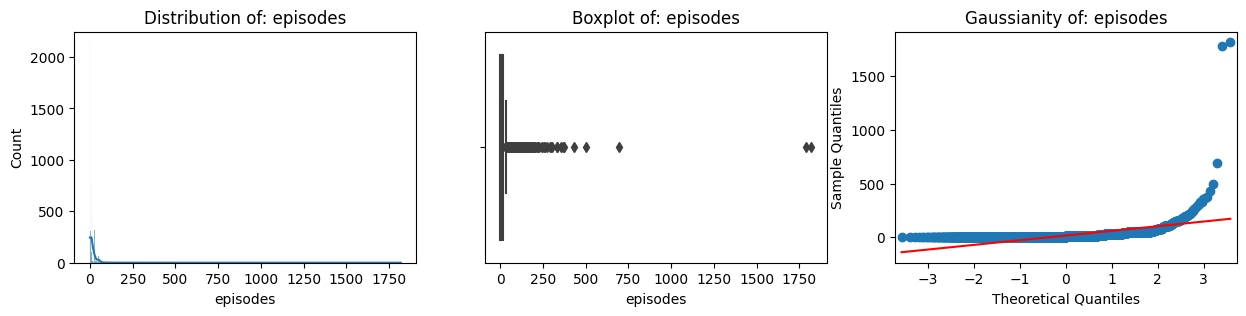

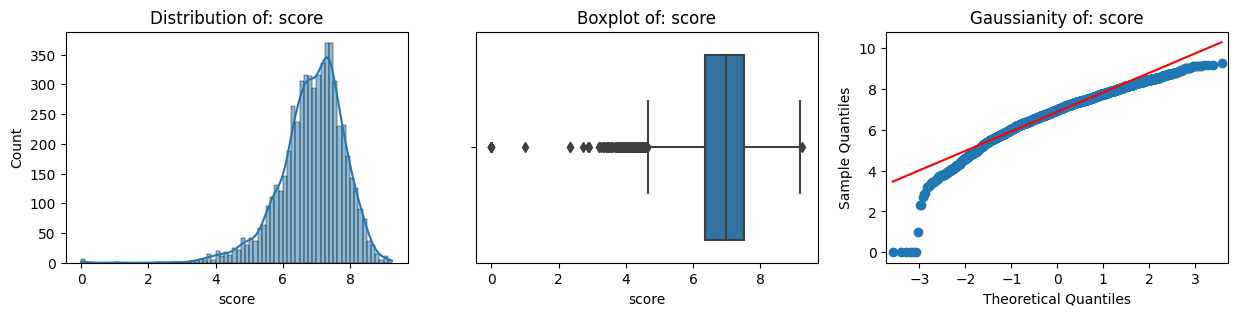

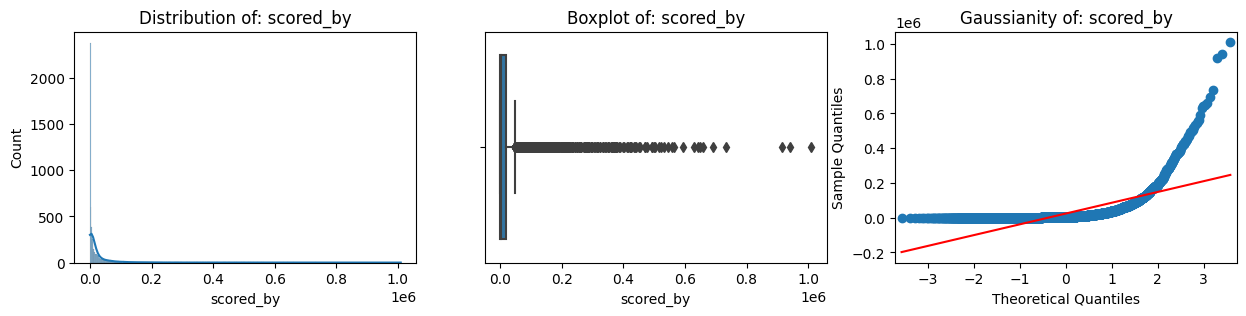

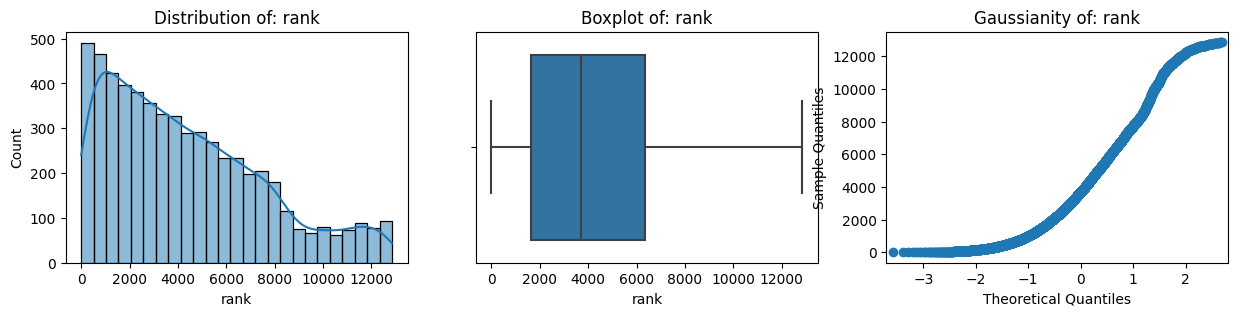

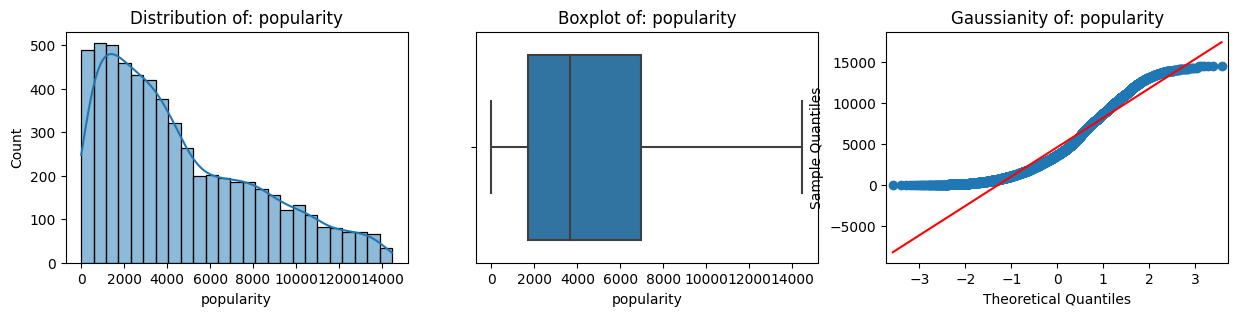

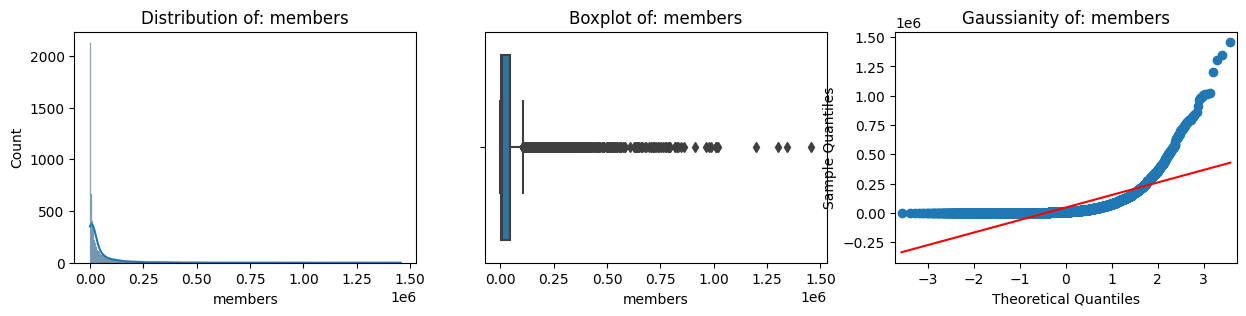

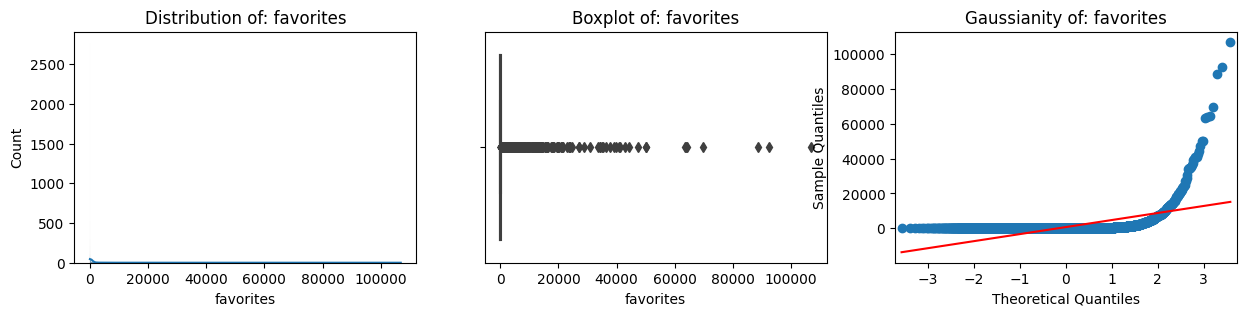

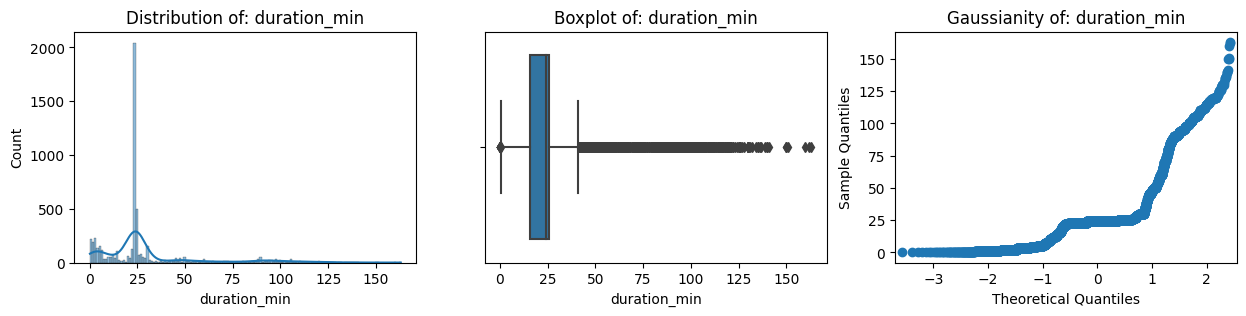

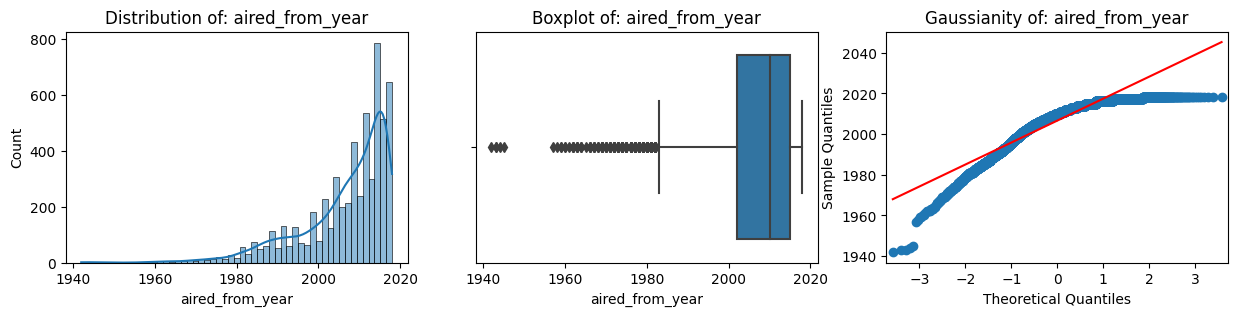

In [242]:
for numerical_feature in Anime_num.columns:
    
    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))
    
    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = Anime_num, x = numerical_feature, kde=True, ax = ax[0])
    
    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data = Anime_num, x = numerical_feature, ax=ax[1])
    
    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(Anime_num[numerical_feature],line='s',ax=ax[2]);

In [243]:
scaler = ColumnTransformer(
    transformers=[
        ("robust_scaler", RobustScaler(),Anime_num.columns )  # Specify the columns for scaling
    ],
    remainder="passthrough"
).set_output(transform="pandas")

scaler

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust_scaler', RobustScaler(),
                                 Index(['episodes', 'score', 'scored_by', 'rank', 'popularity', 'members',
       'favorites', 'duration_min', 'aired_from_year'],
      dtype='object'))])

In [244]:
num_transformer=make_column_transformer(
    (make_pipeline(KNNImputer(),RobustScaler()),Anime_num.columns),
    remainder="passthrough").set_output(transform="pandas")
num_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 Index(['episodes', 'score', 'scored_by', 'rank', 'popularity', 'members',
       'favorites', 'duration_min', 'aired_from_year'],
      dtype='object'))])

In [245]:
num_scaled=num_transformer.fit_transform(Anime_num)
num_scaled

,pipeline__episodes,pipeline__score,pipeline__scored_by,pipeline__rank,pipeline__popularity,pipeline__members,pipeline__favorites,pipeline__duration_min,pipeline__aired_from_year
0,0.384615,0.570175,7.161536,-0.511524,-0.643917,6.583185,19.510490,0.000000,0.153846
1,1.461538,0.798246,4.620332,-0.627722,-0.618395,4.661076,17.902098,0.000000,-0.230769
2,3.384615,0.500000,1.760023,-0.461816,-0.465829,1.439651,5.475524,0.000000,-0.153846
3,2.384615,1.078947,1.726806,-0.716941,-0.514415,1.997546,23.251748,-0.727273,-0.615385
4,1.384615,1.482456,5.496297,-0.771535,-0.607052,4.150031,14.426573,0.000000,0.153846
...,...,...,...,...,...,...,...,...,...
6662,0.384615,0.482456,-0.202951,1.581306,1.728330,-0.244766,-0.132867,-1.000000,0.461538
6664,-0.461538,-6.122807,-0.203851,1.919703,1.234710,-0.238558,-0.125874,-0.545455,0.615385
6665,-0.461538,-2.438596,-0.203586,1.395858,2.007751,-0.246908,-0.132867,1.000000,0.384615
6666,-0.538462,-2.114035,-0.203480,1.638662,1.971642,-0.246619,-0.125874,-2.000000,0.230769


# Categorical feature

In [246]:
AnimesDF_selected["genre"]

0         [Comedy, Supernatural, Romance, Shounen]
1       [Comedy, Parody, Romance, School, Shounen]
2                  [Comedy, Magic, School, Shoujo]
3         [Comedy, Drama, Magic, Romance, Fantasy]
4                [Comedy, Drama, Romance, Shounen]
                           ...                    
6662                                     [Fantasy]
6664               [Slice of Life, Drama, Romance]
6665                                 [Music, Kids]
6666                                        [Kids]
6667                                        [Kids]
Name: genre, Length: 5827, dtype: object

In [247]:
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(Anime_cat)
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_,index=Anime_cat.index)
genre_df

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6664,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6665,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6666,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [248]:
genre_df.sum().sort_index()

Action           1876
Adventure        1300
Cars               41
Comedy           2649
Dementia           44
Demons            185
Drama            1283
Fantasy          1312
Game              160
Harem             125
Historical        415
Horror            211
Josei              67
Kids              406
Magic             535
Martial Arts      168
Mecha             514
Military          298
Music             322
Mystery           446
Parody            246
Police            148
Psychological     200
Romance           972
Samurai            95
School            815
Sci-Fi           1222
Seinen            406
Shoujo            440
Shoujo Ai          45
Shounen          1084
Shounen Ai         55
Slice of Life     904
Space             238
Sports            323
Super Power       328
Supernatural      754
Thriller           79
Vampire            87
Yaoi               19
Yuri                1
dtype: int64

# Concatenate the features

In [249]:
AnimesDF_cleaned = pd.concat([num_scaled, genre_df], axis=1)
AnimesDF_cleaned 

,pipeline__episodes,pipeline__score,pipeline__scored_by,pipeline__rank,pipeline__popularity,pipeline__members,pipeline__favorites,pipeline__duration_min,pipeline__aired_from_year,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0.384615,0.570175,7.161536,-0.511524,-0.643917,6.583185,19.510490,0.000000,0.153846,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1.461538,0.798246,4.620332,-0.627722,-0.618395,4.661076,17.902098,0.000000,-0.230769,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3.384615,0.500000,1.760023,-0.461816,-0.465829,1.439651,5.475524,0.000000,-0.153846,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2.384615,1.078947,1.726806,-0.716941,-0.514415,1.997546,23.251748,-0.727273,-0.615385,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.384615,1.482456,5.496297,-0.771535,-0.607052,4.150031,14.426573,0.000000,0.153846,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,0.384615,0.482456,-0.202951,1.581306,1.728330,-0.244766,-0.132867,-1.000000,0.461538,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6664,-0.461538,-6.122807,-0.203851,1.919703,1.234710,-0.238558,-0.125874,-0.545455,0.615385,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6665,-0.461538,-2.438596,-0.203586,1.395858,2.007751,-0.246908,-0.132867,1.000000,0.384615,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6666,-0.538462,-2.114035,-0.203480,1.638662,1.971642,-0.246619,-0.125874,-2.000000,0.230769,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [250]:
def modify_column_names(df):
    new_column_names = []
    for column in df.columns:
        if "pipeline__" in column:
            new_column_name = column.replace("pipeline__", "")
        else:
            new_column_name = column
        new_column_names.append(new_column_name)
    df.columns = new_column_names
    return df

In [253]:
AnimesDF_cleaned=modify_column_names(AnimesDF_cleaned)

In [254]:
AnimesDF_cleaned

,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0.384615,0.570175,7.161536,-0.511524,-0.643917,6.583185,19.510490,0.000000,0.153846,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1.461538,0.798246,4.620332,-0.627722,-0.618395,4.661076,17.902098,0.000000,-0.230769,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3.384615,0.500000,1.760023,-0.461816,-0.465829,1.439651,5.475524,0.000000,-0.153846,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2.384615,1.078947,1.726806,-0.716941,-0.514415,1.997546,23.251748,-0.727273,-0.615385,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.384615,1.482456,5.496297,-0.771535,-0.607052,4.150031,14.426573,0.000000,0.153846,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,0.384615,0.482456,-0.202951,1.581306,1.728330,-0.244766,-0.132867,-1.000000,0.461538,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6664,-0.461538,-6.122807,-0.203851,1.919703,1.234710,-0.238558,-0.125874,-0.545455,0.615385,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6665,-0.461538,-2.438596,-0.203586,1.395858,2.007751,-0.246908,-0.132867,1.000000,0.384615,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6666,-0.538462,-2.114035,-0.203480,1.638662,1.971642,-0.246619,-0.125874,-2.000000,0.230769,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [255]:
AnimesDF_cleaned.to_csv('AnimesDF_cleaned.csv', index=False)